> 问题 2: 请任选一个国家，建立国家旅游出发人数的预测模型，基于该国家
1995 年至 2020 年的旅游出发人数，预测 2030 和 2050 年的旅游出发人数。

### 加载文件

In [132]:
import json
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('data/A.csv', encoding = 'gb2312')
data

,旅游出发国家,出发国家缩写,旅游到达国家,到达国家缩写,年份,国际旅游人数
0,Afghanistan,AFG,Gabon,GAB,2008,5700
1,Afghanistan,AFG,Cyprus,CYP,2009,8900
2,Afghanistan,AFG,Congo,COG,2010,14700
3,Afghanistan,AFG,Mexico,MEX,2011,16500
4,Afghanistan,AFG,Uganda,UGA,2012,16700
...,...,...,...,...,...,...
4119,Zimbabwe,ZWE,Norway,NOR,2016,19400
4120,Zimbabwe,ZWE,Kuwait,KWT,2017,15800
4121,Zimbabwe,ZWE,Latvia,LVA,2018,19100
4122,Zimbabwe,ZWE,Maldives,MDV,2019,28500


### 处理数据

In [137]:
# 选择需要用于预测的国家的数据，以及对应的年份和旅游人数
selected_country = 'China'  # 选择要预测的国家
data_country = data[data['旅游出发国家'] == selected_country]
years = data_country['年份'].values.reshape(-1, 1)
tourist_counts = data_country['国际旅游人数'].values.reshape(-1, 1)

### 模型预测

In [ ]:
# 建立线性回归模型
model = LinearRegression()
model.fit(years, tourist_counts)

# 预测未来年份的旅游出发人数
future_years = np.array([[2030], [2050]])
predicted_tourist_counts = model.predict(future_years)

### 可视化预测结果

China 2030年预测旅游出发人数:9862472
China 2050年预测旅游出发人数:14651042


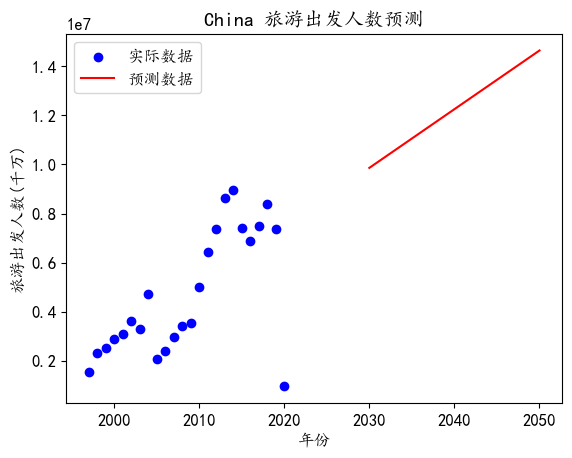

In [147]:
print(f"{selected_country} 2030年预测旅游出发人数:{predicted_tourist_counts[0][0]:.0f}")
print(f"{selected_country} 2050年预测旅游出发人数:{predicted_tourist_counts[1][0]:.0f}")

plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(years, tourist_counts, color='blue', label='实际数据')
plt.plot(future_years, predicted_tourist_counts, color='red', label='预测数据')
plt.xlabel('年份')
plt.ylabel('旅游出发人数(千万)')
plt.title(f'{selected_country} 旅游出发人数预测')
plt.legend()
plt.show()

### 批量预测

In [2]:
d = {}
for indexs in data.index:
    Country_people = data.loc[indexs].values[:][5] 
    Country_year = data.loc[indexs].values[:][4] 
    Country_abb = data.loc[indexs].values[:][0]+ "_" +data.loc[indexs].values[:][1]

    if d.get(Country_abb) == None:
        d.update({Country_abb: {"year":[],"count":[]}})
    d[Country_abb]["year"].append(Country_year)
    d[Country_abb]["count"].append(Country_people)

for i in d:
    model = LinearRegression()
    model.fit(np.array(d[i]['year']).reshape(-1,1), np.array(d[i]['count']).reshape(-1,1))

    future_years = np.array([[2030], [2050]])
    predicted_tourist_counts = model.predict(future_years)
    print(f"{i}\t [2030年预测旅游出发人数:{predicted_tourist_counts[0][0]:.0f}]",end="")
    print(f"[2050年预测旅游出发人数:{predicted_tourist_counts[1][0]:.0f}]")


Afghanistan_AFG	 [2030年预测旅游出发人数:762][2050年预测旅游出发人数:-10777]
Albania_ALB	 [2030年预测旅游出发人数:326180][2050年预测旅游出发人数:511390]
Algeria_DZA	 [2030年预测旅游出发人数:-7723][2050年预测旅游出发人数:-50475]
American Samoa_ASM	 [2030年预测旅游出发人数:2200][2050年预测旅游出发人数:2200]
Andorra_AND	 [2030年预测旅游出发人数:191000][2050年预测旅游出发人数:191000]
Angola_AGO	 [2030年预测旅游出发人数:124357][2050年预测旅游出发人数:199741]
Antigua and Barbuda_ATG	 [2030年预测旅游出发人数:43218][2050年预测旅游出发人数:-11854]
Argentina_ARG	 [2030年预测旅游出发人数:695046][2050年预测旅游出发人数:943648]
Armenia_ARM	 [2030年预测旅游出发人数:173671][2050年预测旅游出发人数:281583]
Aruba_ABW	 [2030年预测旅游出发人数:235943][2050年预测旅游出发人数:337855]
Australia_AUS	 [2030年预测旅游出发人数:5865565][2050年预测旅游出发人数:8850890]
Austria_AUT	 [2030年预测旅游出发人数:2702977][2050年预测旅游出发人数:3577462]
Azerbaijan_AZE	 [2030年预测旅游出发人数:370561][2050年预测旅游出发人数:609442]
Bahamas_BHS	 [2030年预测旅游出发人数:360868][2050年预测旅游出发人数:492453]
Bahrain_BHR	 [2030年预测旅游出发人数:438211][2050年预测旅游出发人数:667858]
Bangladesh_BGD	 [2030年预测旅游出发人数:44698][2050年预测旅游出发人数:75726]
Barbados_BRB	 [2030年预测旅游出发人数:140201][2050年预测旅游出发人

### 输出到excel

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 读取CSV文件，使用GBK编码
csv_file = './data/A.csv'  # 替换为您的CSV文件路径
data = pd.read_csv(csv_file, encoding='GBK')

d = {}
for indexs in data.index:
    Country_people = data.loc[indexs].values[5] 
    Country_year = data.loc[indexs].values[4] 
    Country_abb = data.loc[indexs].values[0] + "_" + data.loc[indexs].values[1]

    if d.get(Country_abb) is None:
        d.update({Country_abb: {"year": [], "count": []}})
    d[Country_abb]["year"].append(Country_year)
    d[Country_abb]["count"].append(Country_people)

results = []

for i in d:
    model = LinearRegression()
    model.fit(np.array(d[i]['year']).reshape(-1, 1), np.array(d[i]['count']).reshape(-1, 1))

    future_years = np.array([[2030], [2050]])
    predicted_tourist_counts = model.predict(future_years)
    
    # 将预测结果取整
    predicted_2030 = round(predicted_tourist_counts[0][0])
    predicted_2050 = round(predicted_tourist_counts[1][0])
    
    result = {
        "Country_Abb": i,
        "Predicted_2030": predicted_2030,
        "Predicted_2050": predicted_2050
    }
    results.append(result)

# 创建DataFrame并保存到Excel文件
output_excel = 'predictions.xlsx'
df = pd.DataFrame(results)
df.to_excel(output_excel, index=False)

print("预测结果已保存到Excel文件:", output_excel)


预测结果已保存到Excel文件: predictions.xlsx
